In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_csv('IMDB-Movie-Data.csv')

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
df.shape

(1000, 12)

In [5]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [6]:
df.set_index('Rank',inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


In [8]:
df.isna().sum()

Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [9]:
df.drop(['Description'],axis=1,inplace=True)

In [10]:
df.nunique()

Title                 999
Genre                 207
Director              644
Actors                996
Year                   11
Runtime (Minutes)      94
Rating                 55
Votes                 997
Revenue (Millions)    814
Metascore              84
dtype: int64

In [11]:
df.head()

,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


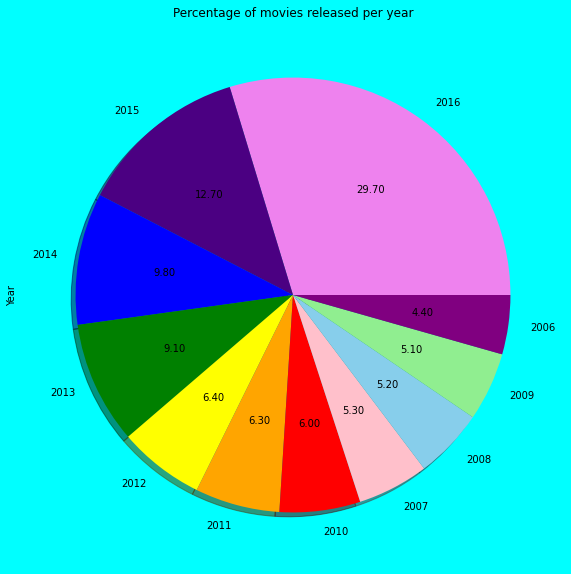

In [12]:
fig, ax = plt.subplots(facecolor='cyan', figsize=(15,10))
df['Year'].value_counts().plot(kind='pie',
                                    colors=['Violet','Indigo','Blue','Green','Yellow','Orange','Red','Pink','Skyblue','lightgreen','purple'],
                                    autopct='%.2f',
                                    shadow=True)
plt.title('Percentage of movies released per year')
plt.show()

In [236]:
x=df['Year'].sort_values().unique()
y=df.groupby('Year').count()['Title']
px.bar(df, x=x, y=y, color=x, title='Year Vs Movie Release',
        labels={
                  'x':'Year',
                  'y':'Count'
              })

In [156]:
x=df['Year'].sort_values().unique()
y=df.groupby('Year').mean()['Revenue (Millions)']
px.bar(df, x=x, y=y, color=x,
              title='Year Vs Mean Revenue')

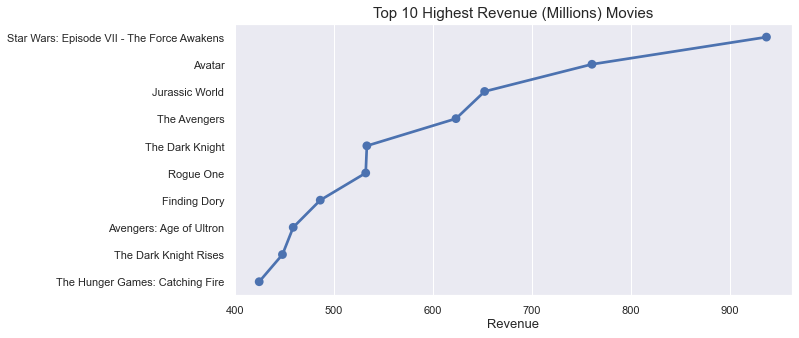

In [67]:
info = pd.DataFrame(df['Revenue (Millions)'].sort_values(ascending = False))
info['title'] = df['Title']
data = list(map(str,(info['title'])))
x = list(info['Revenue (Millions)'][:10])
y = list(data[:10])

ax = sns.pointplot(x=x,y=y)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Revenue (Millions) Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

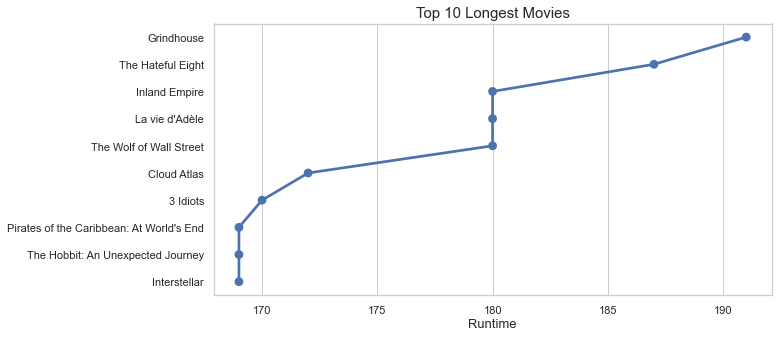

In [227]:
info = pd.DataFrame(df['Runtime (Minutes)'].sort_values(ascending = False))
info['title'] = df['Title']
data = list(map(str,(info['title'])))
x = list(info['Runtime (Minutes)'][:10])
y = list(data[:10])

ax = sns.pointplot(x=x,y=y)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

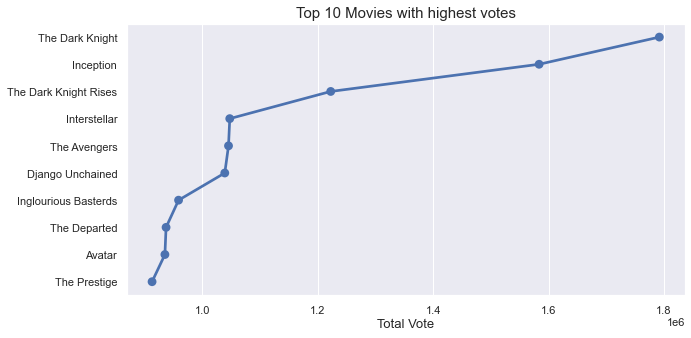

In [72]:
info = pd.DataFrame(df['Votes'].sort_values(ascending = False))
info['title'] = df['Title']
data = list(map(str,(info['title'])))

x = list(info['Votes'][:10])
y = list(data[:10])

ax = sns.pointplot(x=x,y=y)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Movies with highest votes",fontsize = 15)
ax.set_xlabel("Total Vote",fontsize = 13)
sns.set_style("darkgrid")

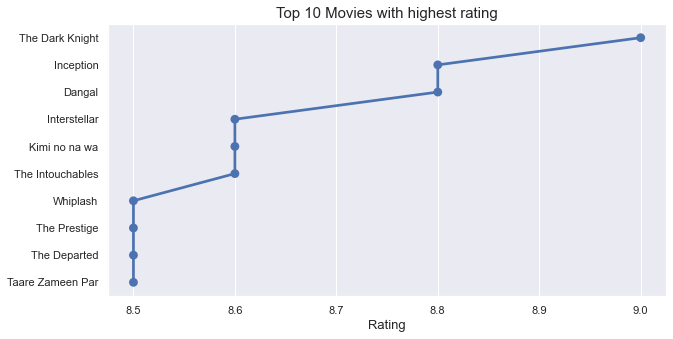

In [127]:
info = pd.DataFrame(df['Rating'].sort_values(ascending = False))
info['title'] = df['Title']
data = list(map(str,(info['title'])))

x = list(info['Rating'][:10])
y = list(data[:10])

ax = sns.pointplot(x=x,y=y)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Movies with highest rating",fontsize = 15)
ax.set_xlabel("Rating",fontsize = 13)
sns.set_style("darkgrid")

In [157]:
rating = df['Rating'].value_counts()
px.bar(df, x=rating.index.values, y=rating.values, color=rating.index.values,
              title='Rating count of movies')

In [158]:
m_score = df['Metascore'].value_counts()
px.bar(df, x=m_score.index.values, y=m_score.values, color=m_score.index.values,
              title='Metascore count of movies')

In [170]:
def count_genre(x):
    data_plot = df[x].str.cat(sep = ',')
    data = pd.Series(data_plot.split(','))
    info = data.value_counts(ascending=False)
    return info

gen=count_genre('Genre')

Index(['Drama', 'Action', 'Comedy', 'Adventure', 'Thriller', 'Crime',
       'Romance', 'Sci-Fi', 'Horror', 'Mystery', 'Fantasy', 'Biography',
       'Family', 'Animation', 'History', 'Sport', 'Music', 'War', 'Western',
       'Musical'],
      dtype='object')

In [178]:
px.bar(df, x=gen.values, y=gen.index, orientation='h',color=gen.index,
              title='Genre with Highest release')

In [182]:
px.pie(df, names=gen.index, values=gen.values)

In [202]:
actors = count_genre('Actors')
actors

Christian Bale         11
Mark Wahlberg          11
 Woody Harrelson        9
Jake Gyllenhaal         9
Matthew McConaughey     9
                       ..
Dominique Swain         1
 Lukas Hassel           1
Natasha Henstridge      1
 Pierre Coffin          1
Cheryl Hines            1
Length: 2394, dtype: int64

In [194]:
n=actors.iloc[:20]
px.bar(df,y=n.values, x=n.index, title='Most Frequent actor',color=n.index)

In [204]:
director = count_genre('Director')
director

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
                     ..
Lee Toland Krieger    1
Gillies MacKinnon     1
Peter Atencio         1
James Mangold         1
Scot Armstrong        1
Length: 644, dtype: int64

In [196]:
n=director.iloc[:20]
px.bar(df,y=n.values, x=n.index, title='Most Frequent director',color=n.index)

In [205]:
px.scatter(df,x=df['Rating'].values,y=df['Title'].values,
            title='Rating of different movies',color=df['Rating'].values,
            height=1600, labels={
                'x':'Rating',
                'y':'Movie Name'
            })